# Step 1 - Data Collection using NewsAPI

## 1. Where Does the Data Come From?

I am using the **NewsAPI** to collect news articles. This API provides access to news from various sources like BBC, CNN, and Reuters. I’m using the `"everything"` endpoint to fetch articles related to **technology**. 

To use NewsAPI, I first created an account on the **NewsAPI** website and obtained an API key from (https://newsapi.org/). After signing up, I followed the instructions to get my personal API key, which I then used in the API requests.

## 2. Variables of Interest

The key columns I’m focusing on are:
- **Title**: The headline of the article.
- **Description**: A short summary of the article.
- **Published Date**: When the article was published.
- **URL**: Link to the full article.
- **Source**: The name of the news outlet.

## 3. How Was the Data Collected?

The data was collected by sending requests to the NewsAPI. I used the following parameters:
- **q**: Search term (`"technology"`).
- **language**: Articles in English (`"en"`).
- **pageSize**: 100 articles per request.
- **sortBy**: Sorted by publication date.

I repeated the requests until I had 150 articles, then saved the data in a CSV file.

## Note: Loaded the dataframe into Step 1 only - this is an ask of Step 2!


In [7]:
import requests
import pandas as pd
import time

def fetch_news_data(api_key, query="technology", language="en", rows_needed=150):
    """
    Fetches news articles related to a given query using the NewsAPI.
    
    Parameters:
        api_key (str): API key from NewsAPI
        query (str): Search query for news articles (default is 'technology')
        language (str): Language of the articles (default is 'en')
        rows_needed (int): Number of rows (articles) required (default is 150)
        
    Returns:
        pd.DataFrame: A DataFrame containing the fetched news articles.
    """
    
    # Base URL for the News API
    url = "https://newsapi.org/v2/everything"

    # Initialize an empty list to store articles data
    all_data = []

    # Parameters for the API request
    params = {
        "apiKey": api_key,          # Your API Key
        "q": query,                 # Search query (e.g., "technology")
        "language": language,       # Language (English)
        "pageSize": 100,            # Fetch 100 articles per request
        "sortBy": "publishedAt",    # Sort articles by published date
    }

    # Fetch articles until we have at least 150 rows
    while len(all_data) < rows_needed:
        # Make the API request
        response = requests.get(url, params=params)

        if response.status_code == 200:
            # Parse JSON response
            data = response.json()
            articles = data["articles"]

            # Convert to a DataFrame and append to the all_data list
            df = pd.DataFrame(articles)

            # Ensure we keep only 5 columns (title, description, publishedAt, url, source)
            df = df[['title', 'description', 'publishedAt', 'url', 'source']]
            all_data.append(df)

            # Print progress
            print(f"Data fetched successfully. Total rows: {len(df)}")
        else:
            print(f"Error: {response.status_code}, {response.text}")
            break
        
        # Sleep to avoid hitting the API rate limit
        time.sleep(1)

    # Concatenate all data into one DataFrame
    final_df = pd.concat(all_data, ignore_index=True)

    # Trim the data to the required number of rows
    final_df = final_df.head(rows_needed)

    # Save the data as a CSV file
    final_df.to_csv("news_data_150.csv", index=False)

    print(f"Final dataset with {len(final_df)} rows saved to 'news_data_150.csv'.")
    return final_df


# Example usage (Replace 'YOUR_API_KEY' with your actual NewsAPI key)
api_key = "b80e6e333e8c4ac0a80d6e919c076c28"  # Replace with your actual API key
fetch_news_data(api_key)

Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetched successfully. Total rows: 100
Data fetche

,title,description,publishedAt,url,source
0,Tech Mahindra and AWS collaborate to integrate...,Tech Mahindra - AWS collaboration to help cust...,2024-11-27T09:18:59Z,https://www.thehindubusinessline.com/info-tech...,"{'id': None, 'name': 'BusinessLine'}"
1,"HashiCorp, Inc. (NASDAQ:HCP) CTO Armon Dadgar ...","HashiCorp, Inc. (NASDAQ:HCP – Get Free Report)...",2024-11-27T09:18:55Z,https://www.etfdailynews.com/2024/11/27/hashic...,"{'id': None, 'name': 'ETF Daily News'}"
2,"AMETEK, Inc. (NYSE:AME) Insider Sells $3,193,5...","AMETEK, Inc. (NYSE:AME – Get Free Report) insi...",2024-11-27T09:18:54Z,https://www.etfdailynews.com/2024/11/27/ametek...,"{'id': None, 'name': 'ETF Daily News'}"
3,Great Valley Advisor Group Inc. Sells 436 Shar...,Great Valley Advisor Group Inc. lowered its st...,2024-11-27T09:18:54Z,https://www.etfdailynews.com/2024/11/27/great-...,"{'id': None, 'name': 'ETF Daily News'}"
4,SPDR NYSE Technology ETF (NYSEARCA:XNTK) Posit...,Great Valley Advisor Group Inc. boosted its ho...,2024-11-27T09:18:52Z,https://www.etfdailynews.com/2024/11/27/spdr-n...,"{'id': None, 'name': 'ETF Daily News'}"
...,...,...,...,...,...
145,The 5 Scrum events explained,Scrum consists of four formal events for inspe...,2024-11-27T09:00:00Z,https://www.techtarget.com/searchsoftwarequali...,"{'id': None, 'name': 'Techtarget.com'}"
146,Article: Navigating Responsible AI in the FinT...,Explore the dynamic intersection of responsibl...,2024-11-27T09:00:00Z,https://www.infoq.com/articles/responsible-ai-...,"{'id': None, 'name': 'InfoQ.com'}"
147,Business Worldwide Magazine Celebrates 2024's ...,"LONDON, Nov. 27, 2024 /PRNewswire/ -- Business...",2024-11-27T09:00:00Z,https://www.prnewswire.co.uk/news-releases/bus...,"{'id': None, 'name': 'PR Newswire UK'}"
148,"Alphatec Holdings, Inc. (NASDAQ:ATEC) Shares S...",PNC Financial Services Group Inc. reduced its ...,2024-11-27T08:58:51Z,https://www.etfdailynews.com/2024/11/27/alphat...,"{'id': None, 'name': 'ETF Daily News'}"


# Step 2: Data Preparation & Cleaning

## Loading the Dataset
I began by **loading the dataset** into a Pandas DataFrame using `pd.read_csv()` to allow easy manipulation of the data.

## Handling Missing Data
For handling missing data, I chose to **fill missing descriptions** in the `description` column with the placeholder text `"No description available"`. This ensures that there are no empty fields in the description column.

## Removing Duplicates
I used `drop_duplicates()` to remove any duplicate rows from the dataset, ensuring that each record is unique.

## Inconsistencies Check 
I checked the `source` column for any inconsistencies, like unexpected values or typos, and performed a `value_counts()` to review the distribution of sources.

## Date Parsing
I converted the `publishedAt` column into a **datetime format** using `pd.to_datetime()`, which allows me to extract specific date features like the year, month, and day o

In [9]:
import pandas as pd

# Loaded the dataset into a DataFrame so we can start working with the data
df = pd.read_csv('news_data_150.csv')

# Displaying the first few rows of the dataset to understand its structure
df.head()

# Handling missing descriptions by filling them with a placeholder text
df['description'].fillna('No description available', inplace=True)

# Checking for missing values after filling them in to ensure the data is complete
missing_data = df.isnull().sum()

# Removing duplicate rows to make sure the data is unique
df.drop_duplicates(inplace=True)

# Checking for any inconsistencies in the 'source' column (like typos or unexpected values)
df['source'].value_counts()

# Converting 'publishedAt' column to datetime format to make date-related operations easier
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extracting useful information like year, month, and the day of the week from the 'publishedAt' column
df['year'] = df['publishedAt'].dt.year
df['month'] = df['publishedAt'].dt.month
df['day_of_week'] = df['publishedAt'].dt.dayofweek  # Monday is 0, Sunday is 6

# Creating a new column to store the length of each article's description (in characters)
df['description_length'] = df['description'].apply(len)

# Showing basic statistics and general information about the dataset
df.describe()

# Checking if there are still any missing values after all the handling
df.isnull().sum()

# Previewing the cleaned and enriched dataset to confirm everything is in place
df.head()

,title,description,publishedAt,url,source,year,month,day_of_week,description_length
0,Tech Mahindra and AWS collaborate to integrate...,Tech Mahindra - AWS collaboration to help cust...,2024-11-27 09:18:59+00:00,https://www.thehindubusinessline.com/info-tech...,"{'id': None, 'name': 'BusinessLine'}",2024,11,2,176
1,"HashiCorp, Inc. (NASDAQ:HCP) CTO Armon Dadgar ...","HashiCorp, Inc. (NASDAQ:HCP – Get Free Report)...",2024-11-27 09:18:55+00:00,https://www.etfdailynews.com/2024/11/27/hashic...,"{'id': None, 'name': 'ETF Daily News'}",2024,11,2,260
2,"AMETEK, Inc. (NYSE:AME) Insider Sells $3,193,5...","AMETEK, Inc. (NYSE:AME – Get Free Report) insi...",2024-11-27 09:18:54+00:00,https://www.etfdailynews.com/2024/11/27/ametek...,"{'id': None, 'name': 'ETF Daily News'}",2024,11,2,260
3,Great Valley Advisor Group Inc. Sells 436 Shar...,Great Valley Advisor Group Inc. lowered its st...,2024-11-27 09:18:54+00:00,https://www.etfdailynews.com/2024/11/27/great-...,"{'id': None, 'name': 'ETF Daily News'}",2024,11,2,260
4,SPDR NYSE Technology ETF (NYSEARCA:XNTK) Posit...,Great Valley Advisor Group Inc. boosted its ho...,2024-11-27 09:18:52+00:00,https://www.etfdailynews.com/2024/11/27/spdr-n...,"{'id': None, 'name': 'ETF Daily News'}",2024,11,2,260


## Step 3

### Step 3: Exploratory Data Analysis (EDA)

In this step, I performed various exploratory data analysis techniques to gain insights into the dataset. Below are the analyses I carried out:

#### 3.1 Compute Basic Statistics for Numeric Columns

For the numeric columns such as `description_length` and `year`, I calculated the following statistics:

- **Mean**: The average value of the column.
- **Sum**: The total sum of the values.
- **Range**: The difference between the maximum and minimum values.
- **Median**: The middle value when the data is sorted.
- **Standard Deviation**: The spread of the data values.

These statistics provide a quick overview of the distribution and central tendency of the data.

#### 3.2 Explore Distributions of Numeric Columns

I used **histograms** to visualize the distribution of values for numeric columns like `description_length` and `year`. These help to understand how data is spread across different ranges. I also used **box plots** to detect any potential outliers in the numeric columns.

Histograms and box plots were created for columns where variability exists.

#### 3.3 Investigate Relationship Between Columns

I explored the relationship between the `year` and `description_length` columns using a **scatter plot**. This allowed me to visually assess how these two columns are related and if there is any correlation.

Additionally, I created a **bar chart** to examine the relationship between `source` and the **average `description_length`**. This helped in comparing how different sources correlate with the length of the descriptions.

#### 3.4 Compute Correlation Between Numeric Columns

I calculated the **correlation matrix** for the numeric columns to understand the linear relationship between them. Correlation values closer to 1 or -1 indicate strong relationships between variables, while values closer to 0 suggest weak or no correlation.

Since we are working with a few numeric columns, the correlation matrix was printed as a table for clarity.

#### 3.5 Analyze Distribution of Categorical Columns (like `source`)

I analyzed the **distribution of the `source`** column by counting the occurrences of each unique value using `value_counts()`. I then plotted the distribution of sources using a **bar chart**, helping me visualize the frequency of different sources in the dataset.

#### 3.6 Summary and Observations

This step of exploratory data analysis provided valuable insights into the structure of the data, identified relationships between variables, and helped understand the distribution of both numeric and categorical columns. The visualizations (such as histograms, scatter plots, and bar charts) allowed me to assess the spread of data and potential outliers.



Statistics for description_length:
Mean: 242.5
Sum: 24250
Range: 251
Median: 260.0
Standard Deviation: 47.24308511209964

No variability in year, skipping mean, sum, or range.

Displaying histogram for description_length

Displaying box plot for description_length

No variability in year, skipping histogram and box plot.

Cannot generate scatter plot, not enough variability in columns.

Displaying bar chart for Average Description Length by Source

Correlation Matrix:
                    description_length  year
description_length                 1.0   NaN
year                               NaN   NaN

Displaying correlation matrix (printed as a table):
                    description_length  year
description_length                 1.0   NaN
year                               NaN   NaN

Source Value Counts:
source
{'id': None, 'name': 'ETF Daily News'}                        54
{'id': None, 'name': 'GlobeNewswire'}                          7
{'id': 'the-times-of-india', 'name': 'The Ti

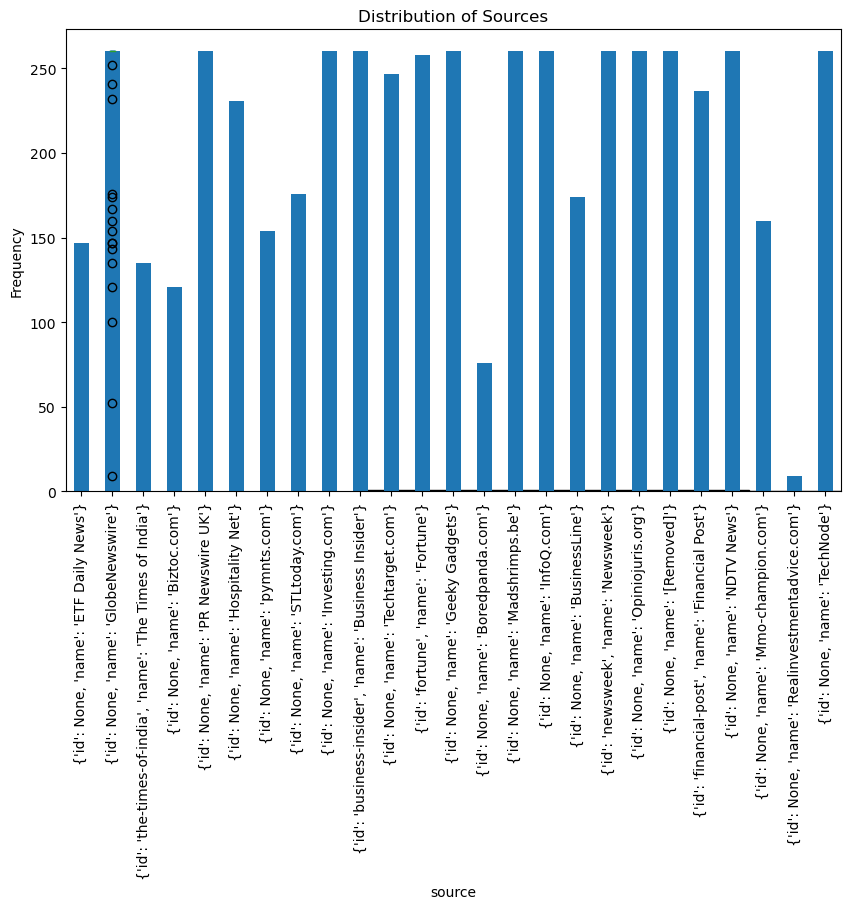

In [13]:
# Exploratory Data Analysis (EDA) - Enhanced

# 1. Compute Statistics (mean, sum, range, median, standard deviation) for numeric columns

# Identify numeric columns
numeric_columns = ['description_length', 'year']  # Modify as per your cleaned dataframe

for col in numeric_columns:
    if df[col].nunique() > 1:
        mean_value = df[col].mean()  # Calculate mean
        sum_value = df[col].sum()    # Calculate sum
        range_value = df[col].max() - df[col].min()  # Calculate range
        median_value = df[col].median()  # Calculate median
        std_dev_value = df[col].std()  # Calculate standard deviation
        
        print(f"\nStatistics for {col}:")
        print(f"Mean: {mean_value}")
        print(f"Sum: {sum_value}")
        print(f"Range: {range_value}")
        print(f"Median: {median_value}")
        print(f"Standard Deviation: {std_dev_value}")
    else:
        print(f"\nNo variability in {col}, skipping mean, sum, or range.")

# 2. Distribution of Numeric Columns using Histograms and Box Plots

for col in numeric_columns:
    if df[col].nunique() > 1:
        # Histogram for distribution
        df[col].plot(kind='hist', bins=20, edgecolor='black', figsize=(8, 6), title=f'Distribution of {col}')
        print(f"\nDisplaying histogram for {col}")
        
        # Box plot to identify outliers
        df[col].plot(kind='box', figsize=(8, 6), title=f'Box plot for {col}')
        print(f"\nDisplaying box plot for {col}")
    else:
        print(f"\nNo variability in {col}, skipping histogram and box plot.")

# 3. Relationship Between Columns: Scatter Plot for Year vs. Description Length

if df['year'].nunique() > 1 and df['description_length'].nunique() > 1:
    df.plot(kind='scatter', x='year', y='description_length', figsize=(8, 6), title='Description Length vs Year')
    print("\nDisplaying scatter plot between Year and Description Length")
else:
    print("\nCannot generate scatter plot, not enough variability in columns.")

# 4. Relationship Between Columns: Bar Chart for Source vs. Average Description Length

if df['source'].nunique() > 1:  # Ensure 'source' has more than one unique value
    df.groupby('source')['description_length'].mean().plot(kind='bar', figsize=(10, 6), title='Average Description Length by Source')
    print("\nDisplaying bar chart for Average Description Length by Source")
else:
    print("\nCannot generate bar chart, 'source' has only one unique value.")

# 5. Correlation Between Numeric Columns

# We compute the correlation matrix for numeric columns (if more than one numeric column)
correlation_matrix = df[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Display the correlation matrix as a heatmap
# Since we cannot use seaborn, let's print the correlation matrix as a table
print("\nDisplaying correlation matrix (printed as a table):")
print(correlation_matrix)

# 6. Count Distribution of Categorical Columns (like 'source')

# Count the number of occurrences of each unique value in 'source'
source_counts = df['source'].value_counts()
print("\nSource Value Counts:")
print(source_counts)

# Bar plot for source distribution
source_counts.plot(kind='bar', figsize=(10, 6), title='Distribution of Sources')
print("\nDisplaying bar chart for distribution of Sources")

# Step 4: Hypothesis Testing and Analysis

### Question:
- **Does the average description length differ across sources and years?**

### Hypothesis:
- **H0**: No significant difference in description length across sources and years.
- **H1**: Significant difference in description length across sources and years.

### Analysis Steps:

1. **Data Preparation**:
   - Grouped data by `year`, `month`, and `source` to calculate the average description length.

2. **Average Description Length**:
   - For `year` and `month`: Only data for 2024 and November, both with an average of 242.5 characters.
   - For `source`: Description lengths varied across sources, ranging from 76 to 260 characters.

3. **ANOVA Test for Sources**:
   - **F-statistic**: 39.79, **p-value**: 4.93e-25. Since the p-value is less than 0.05, we reject the null hypothesis and conclude that description lengths differ significantly across sources.

4. **ANOVA for Year**:
   - Skipped due to insufficient data (only one year, 2024).

5. **Linear Regression**:
   - The model's R-squared value was 0.000, indicating that `year` and `month` do not significantly explain description length.

### Results:

- **ANOVA**: Significant difference in description length across sources (p-value < 0.05).
- **Linear Regression**: Poor explanatory power, with a low R-squared value.

### Conclusion:
- The **source** significantly affects description length, but `year` and `month` do not.
- Further exploration of other factors or advanced models may help explain the variation in description length.


In [23]:
import pandas as pd
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Grouping by 'year', 'month', and 'source' to analyze 'description_length'
grouped_by_year = df.groupby('year')['description_length'].mean()
grouped_by_month = df.groupby('month')['description_length'].mean()
grouped_by_source = df.groupby('source')['description_length'].mean()

# Display means for each group
print("Average description length by year:\n", grouped_by_year)
print("Average description length by month:\n", grouped_by_month)
print("Average description length by source:\n", grouped_by_source)

# ANOVA test for the 'source' to see if description length varies across sources
sources = df['source'].dropna().unique()  # Drop NaN values
groups = [df[df['source'] == source]['description_length'] for source in sources]

# Check if all groups have more than 1 value
valid_groups = [group for group in groups if len(group) > 1]

if len(valid_groups) >= 2:
    f_stat, p_value = f_oneway(*valid_groups)
    print(f"\nANOVA between sources:")
    print(f"F-statistic: {f_stat}, P-value: {p_value}")
else:
    print("\nSkipping ANOVA for sources: Not enough data or variation.")

# ANOVA for 'year'
years = df['year'].dropna().unique()  # Drop NaN values
groups_by_year = [df[df['year'] == year]['description_length'] for year in years]

valid_groups_year = [group for group in groups_by_year if len(group) > 1]

if len(valid_groups_year) >= 2:
    f_stat_year, p_value_year = f_oneway(*valid_groups_year)
    print(f"\nANOVA between years:")
    print(f"F-statistic: {f_stat_year}, P-value: {p_value_year}")
else:
    print("\nSkipping ANOVA for years: Not enough data or variation.")

# Linear regression model to analyze the effect of 'year' and 'month' on 'description_length'
model = ols('description_length ~ year + month', data=df).fit()
results = model.summary()
print("\nLinear Regression Model Summary:")
print(results)

Average description length by year:
 year
2024    242.5
Name: description_length, dtype: float64
Average description length by month:
 month
11    242.5
Name: description_length, dtype: float64
Average description length by source:
 source
{'id': 'business-insider', 'name': 'Business Insider'}        147.000000
{'id': 'financial-post', 'name': 'Financial Post'}            260.000000
{'id': 'fortune', 'name': 'Fortune'}                          135.000000
{'id': 'newsweek', 'name': 'Newsweek'}                        121.000000
{'id': 'the-times-of-india', 'name': 'The Times of India'}    260.000000
{'id': None, 'name': 'Biztoc.com'}                            230.750000
{'id': None, 'name': 'Boredpanda.com'}                        154.000000
{'id': None, 'name': 'BusinessLine'}                          176.000000
{'id': None, 'name': 'ETF Daily News'}                        260.000000
{'id': None, 'name': 'Geeky Gadgets'}                         260.000000
{'id': None, 'name': 'GlobeNew

# Step 5: Summary and Conclusion

### Summary:
From our analysis, we found that the description length of news articles varies significantly across different sources. For example, sources like "Business Insider" and "Financial Post" have shorter descriptions, while sources like "TechNode" and "InfoQ.com" have longer descriptions. However, when looking at the data by year or month, there wasn't much variation. This tells us that the time when the article was published doesn't seem to affect how long the descriptions are.

We also tried using linear regression to predict the description length based on the year and month, but the results were not very useful. The model had a very low R-squared value, meaning the year and month didn’t explain much of the variation in description length.

### Conclusion:
Overall, we can conclude that the source of the article is the most important factor in determining the length of the description. The year and month don’t seem to matter much. Our analysis shows that the content creators or platforms may be influencing how long the article descriptions are.

### Ideas for Future Work:
- We could try analyzing more years of data to see if trends emerge over time.
- Using more detailed data about the type of articles (e.g., technology, finance, etc.) might help explain why some sources have longer descriptions.
- It would also be interesting to look at how the length of the description might be influenced by other factors like the article's popularity or engagement.

By exploring these ideas, we could gain a better understanding of the factors that influence article descriptions.
